### ***Electric Vehicles Data Analysis***

Electric vehicles (EVs) are automobiles powered by electricity stored in rechargeable batteries. They offer a cleaner and more sustainable alternative to traditional internal combustion engine vehicles, as they produce zero tailpipe emissions and reduce reliance on fossil fuels. EVs are becoming increasingly popular due to advancements in battery technology, extended driving ranges, and a growing charging infrastructure. They come in various types, including battery electric vehicles (BEVs) that rely solely on electric power, and plug-in hybrid electric vehicles (PHEVs) that combine electric and internal combustion engine propulsion.







Importing Necessary Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Reading The Dataset

In [12]:
df=pd.read_csv("/content/my new dataset.csv")

Analysing The Dataset

In [13]:
df.shape

(50027, 17)

In [14]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude'],
      dtype='object')

In [15]:
#checking for null values
df.isnull().any().sum()
#as we do not have any null values there is no need for fillna()

0

In [16]:
df.head()

County      City State  Postal Code  Model Year       Make    Model  \
0     King   Seattle    WA        98121        2022    HYUNDAI  IONIQ 5   
1   Pierce       Roy    WA        98580        2020      TESLA  MODEL 3   
2     King   Seattle    WA        98104        2019  CHEVROLET  BOLT EV   
3  Spokane   Spokane    WA        99203        2022  CHEVROLET  BOLT EV   
4     King  Kirkland    WA        98033        2021      VOLVO     XC90   

                Electric Vehicle Type  \
0         Battery Electric Vehicle      
1         Battery Electric Vehicle      
2         Battery Electric Vehicle      
3         Battery Electric Vehicle      
4  Plug-in Hybrid Electric Vehicle      

                                                CAFV  Electric Range  \
0  Eligibility unknown as battery range has not b...               0   
1            Clean Alternative Fuel Vehicle Eligible             322   
2            Clean Alternative Fuel Vehicle Eligible             238   
3  Eligibility unknown as battery range has not b...               0   
4              Not eligible due to low battery range              18   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                    36       195373930   
1          0                     2       180505216   
2          0                    43       205949320   
3          0                     6       212353508   
4          0                    45       168693787   

                                    Electric Utility  2020 Census Tract  \
0       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)        53033007201   
1  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...        53053073001   
2       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)        53033008500   
3                      MODERN ELECTRIC WATER COMPANY        53063004200   
4      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53033022401   

    Longitude   latitude  
0 -122.344000  47.615385  
1 -122.522985  46.987600  
2 -122.329075  47.601800  
3 -117.425265  47.635365  
4 -122.202640  47.678500

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50027 entries, 0 to 50026
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County                 50027 non-null  object 
 1   City                   50027 non-null  object 
 2   State                  50027 non-null  object 
 3   Postal Code            50027 non-null  int64  
 4   Model Year             50027 non-null  int64  
 5   Make                   50027 non-null  object 
 6   Model                  50027 non-null  object 
 7   Electric Vehicle Type  50027 non-null  object 
 8   CAFV                   50027 non-null  object 
 9   Electric Range         50027 non-null  int64  
 10  Base MSRP              50027 non-null  int64  
 11  Legislative District   50027 non-null  int64  
 12  DOL Vehicle ID         50027 non-null  int64  
 13  Electric Utility       50027 non-null  object 
 14  2020 Census Tract      50027 non-null  int64  
 15  Lo

In [ ]:
#describing the dataset i;e. statistical analysis
df.describe()

Postal Code    Model Year  Electric Range      Base MSRP  \
count  50027.000000  50027.000000    50027.000000   50027.000000   
mean   98262.617487   2019.633938       75.240270    1507.899334   
std      307.495886      3.000890       99.034493   10191.384929   
min    98001.000000   1999.000000        0.000000       0.000000   
25%    98052.000000   2018.000000        0.000000       0.000000   
50%    98121.000000   2021.000000       21.000000       0.000000   
75%    98371.000000   2022.000000      150.000000       0.000000   
max    99403.000000   2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract     Longitude  \
count          50027.000000    5.002700e+04       5.002700e+04  50027.000000   
mean              29.295281    2.062407e+08       5.304023e+10   -122.071865   
std               14.922274    8.631033e+07       1.635385e+07      1.042624   
min                1.000000    4.385000e+03       5.300195e+10   -124.625140   
25%               18.000000    1.585588e+08       5.303301e+10   -122.394185   
50%               34.000000    2.058317e+08       5.303303e+10   -122.287180   
75%               43.000000    2.308625e+08       5.305307e+10   -122.151665   
max               49.000000    4.789346e+08       5.307794e+10   -117.044370   

           latitude  
count  50027.000000  
mean      47.481992  
std        0.608674  
min       45.583863  
25%       47.357985  
50%       47.613850  
75%       47.737796  
max       48.996340

**1. Electric Vehicle Adoption Analysis**

In [ ]:
#Grouping the data by counties, cities
grouped_by_county = df.groupby('County').size()
grouped_by_city = df.groupby('City').size()

#Calculate the adoption rate and popularity of electric vehicles in different counties,cities
total_electric_vehicles = df.shape[0]
adoption_rate_county = grouped_by_county / total_electric_vehicles * 100
adoption_rate_city = grouped_by_city / total_electric_vehicles * 100

In [ ]:
print(adoption_rate_county)


County
Adams            0.033982
Asotin           0.059968
Benton           1.343275
Chelan           0.691627
Clallam          0.663642
Clark            5.463050
Columbia         0.013992
Cowlitz          0.405781
Douglas          0.201891
Ferry            0.021988
Franklin         0.285846
Garfield         0.001999
Grant            0.327823
Grays Harbor     0.363804
Island           1.085414
Jefferson        0.617666
King            50.930498
Kitsap           3.140304
Kittitas         0.349811
Klickitat        0.153917
Lewis            0.399784
Lincoln          0.023987
Mason            0.491734
Okanogan         0.163911
Pacific          0.147920
Pend Oreille     0.025986
Pierce           8.273532
San Juan         0.637656
Skagit           1.269315
Skamania         0.129930
Snohomish       12.315350
Spokane          2.718532
Stevens          0.133928
Thurston         3.472125
Wahkiakum        0.035981
Walla Walla      0.265856
Whatcom          2.630579
Whitman          0.177904
Yakim

In [ ]:
print(adoption_rate_city)

City
Aberdeen          0.107942
Acme              0.001999
Addy              0.003998
Airway Heights    0.013992
Alderdale         0.001999
                    ...   
Yacolt            0.017990
Yakima            0.337818
Yarrow Point      0.101945
Yelm              0.133928
Zillah            0.017990
Length: 400, dtype: float64


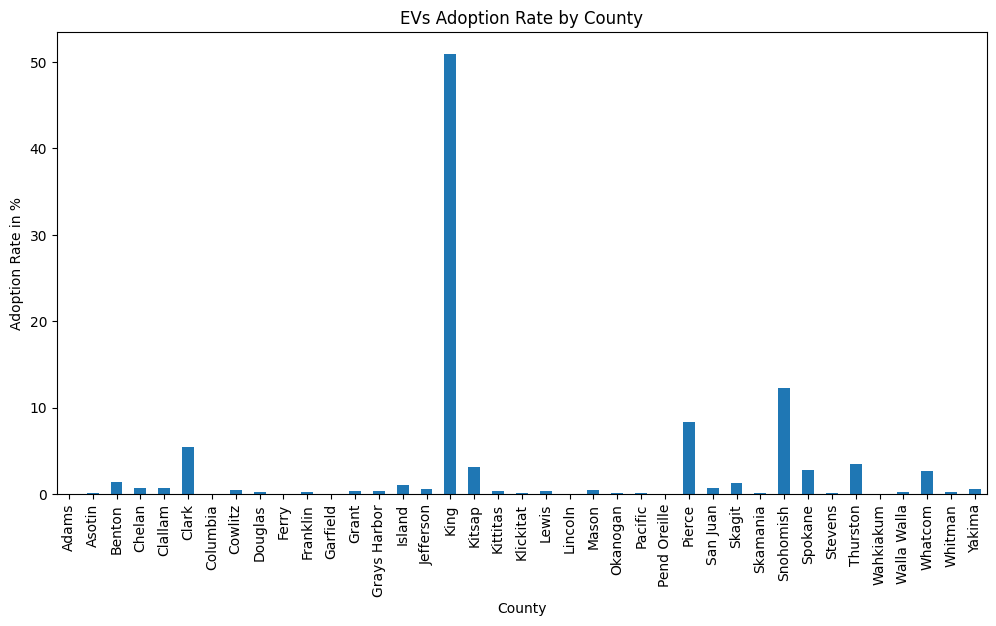

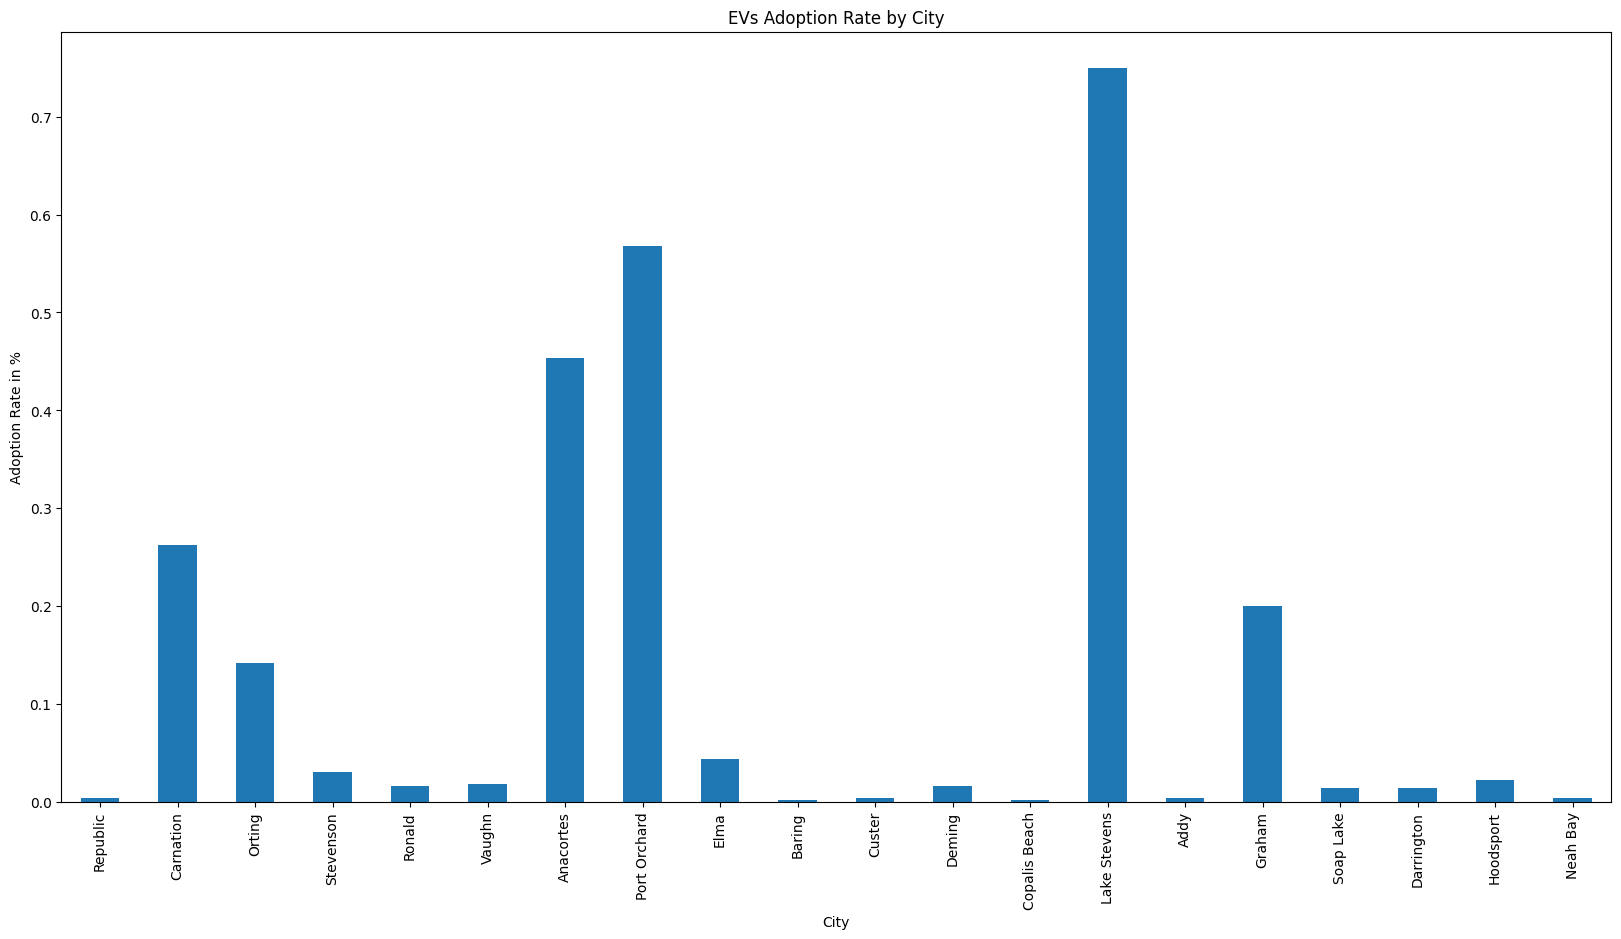

In [ ]:
#Visualize the results
# Plotting adoption rate by county
plt.figure(figsize=(12, 6))
adoption_rate_county.plot(kind='bar')
plt.title('EVs Adoption Rate by County')
plt.xlabel('County')
plt.ylabel('Adoption Rate in %')
plt.xticks(rotation=90)
plt.show()

# Plotting adoption rate by city samples of 20
plt.figure(figsize=(20, 10))
adoption_rate_city.sample(20).plot(kind='bar')
plt.title('EVs Adoption Rate by City')
plt.xlabel('City')
plt.ylabel('Adoption Rate in %')
plt.xticks(rotation=90)
plt.show()

**2.Electric Vehicle Types:**

In [ ]:
df['Electric Vehicle Type'].unique()
df1=pd.DataFrame(df['Electric Vehicle Type'].value_counts())

In [ ]:
df1

Electric Vehicle Type
Battery Electric Vehicle                            38447
Plug-in Hybrid Electric Vehicle                     11580

In [ ]:
import plotly.express as px
fig=px.pie(df1,values="Electric Vehicle Type",names=['Battery Electric Vehicle','Plug-in Hybrid Electric Vehicle'])
fig.update_layout(title=dict(text='Pie chart of EVs types'))
fig.update_traces(textposition='outside',textinfo='percent+label')
fig.show()

**3. Electric Range and Pricing Analysis:**

In [ ]:
df['Base MSRP'].value_counts()

0         48700
69900       547
31950       171
52900        77
54950        57
32250        53
39995        52
59900        52
36900        41
64950        34
44100        33
33950        31
45600        25
52650        24
34995        23
55700        18
36800        17
53400        17
81100        10
90700         9
75095         9
98950         7
43700         5
102000        4
89100         3
110950        3
109000        2
184400        2
845000        1
Name: Base MSRP, dtype: int64

In [ ]:

# Select the columns for analysis
df_prices = df[['Electric Range', 'Base MSRP']]

# Calculate the correlation
correlation = df_prices['Electric Range'].corr(df_prices['Base MSRP'])
print("Correlation between Electric Range and Base MSRP:", correlation)

# Create a scatter plot using Plotly Express
fig = px.scatter(df_prices, x='Electric Range', y='Base MSRP', title='Electric Range vs. Base MSRP',
                 labels={'Electric Range': 'Electric Range', 'Base MSRP': 'Base MSRP'},
                 trendline='ols',  # Add a linear regression trendline
                 opacity=0.7)  # Adjust opacity for data points
fig.show()


Correlation between Electric Range and Base MSRP: 0.09110812342308004


**4.Clean Alternative Fuel Vehicles:**

In [ ]:
#Extract relevant columns for the analysis
df_cafv = df[['CAFV', 'County', 'City']]

# Step 4: Analyze the distribution of clean alternative fuel vehicles
cafv_vehicle_counts = df_cafv['CAFV'].value_counts()
cafv_vehicle_percentages = cafv_vehicle_counts / len(df_cafv) * 100

# Display the distribution of clean alternative fuel vehicles
print("CAFV Distribution:")
print(cafv_vehicle_percentages)

CAFV Distribution:
Clean Alternative Fuel Vehicle Eligible                         45.727307
Eligibility unknown as battery range has not been researched    41.803426
Not eligible due to low battery range                           12.469267
Name: CAFV, dtype: float64


In [ ]:
# Calculate the distribution of CAFV percentages
cafv_vehicle_percentages = df['CAFV'].value_counts(normalize=True) * 100

# Create a bar plot using Plotly Express
fig = px.bar(cafv_vehicle_percentages, x=cafv_vehicle_percentages.index, y=cafv_vehicle_percentages.values,
             title='Distribution of CAFV',
             labels={'x': 'CAFV', 'y': 'Percentage'},
             text=cafv_vehicle_percentages.values,
             width=800, height=400)
fig.update_xaxes(tickangle=-30)
fig.update_layout(xaxis_type='category')

# Show the interactive plot
fig.show()


**5. Legislative District Impact:**

In [ ]:
#Extract relevant columns for the analysis
df_legislative = df[['Legislative District', 'CAFV', 'Electric Vehicle Type']]

#Analyzing EV adoption and CAFV usage in each legislative district
district_vehicle_counts = df_legislative.groupby('Legislative District').size()
district_cafv_counts = df_legislative[df_legislative['CAFV'] == 'Yes'].groupby('Legislative District').size()
district_ev_counts = df_legislative[df_legislative['Electric Vehicle Type'] == 'Electric Car'].groupby('Legislative District').size()

In [ ]:
print(district_vehicle_counts)
print(district_cafv_counts)
print(district_ev_counts)

Legislative District
1     2238
2      590
3      287
4      469
5     2228
6      437
7      253
8      558
9      273
10     930
11    1510
12     511
13     351
14     318
15     115
16     292
17     786
18    1174
19     291
20     403
21    1344
22    1159
23    1079
24     737
25     569
26    1021
27     746
28     699
29     296
30     594
31     982
32    1054
33     617
34    1559
35     662
36    2228
37    1587
38     473
39     838
40    1269
41    3157
42     697
43    1812
44    1354
45    3324
46    1950
47     829
48    2676
49     701
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)


In [ ]:

# Calculate vehicle counts by legislative district
district_vehicle_counts = df['Legislative District'].value_counts()
district_cafv_counts = df[df['CAFV'] == 'Yes']['Legislative District'].value_counts()
district_ev_counts = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Legislative District'].value_counts()

# Create a DataFrame for the stacked bar plot
plot_data = pd.DataFrame({
    'Legislative District': district_vehicle_counts.index,
    'Total Vehicles': district_vehicle_counts,
    'CAFVs': district_cafv_counts,
    'Electric Cars': district_ev_counts
})

# Create a stacked bar plot using Plotly Express
fig = px.bar(plot_data, x='Legislative District',
             y=['Total Vehicles', 'CAFVs', 'Electric Cars'],
             title='EV Adoption and CAFV Usage by Legislative District',
             labels={'Legislative District': 'Legislative District', 'value': 'Vehicle Count'},
             category_orders={'Legislative District': district_vehicle_counts.index},
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
             opacity=0.7)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


**6.Electric Utility Analysis:**

In [ ]:
# Group the data by counties and cities and calculate the count of electric vehicles in each group
count_by_county = df.groupby('County')['Electric Vehicle Type'].sum().reset_index()
count_by_city = df.groupby('City')['Electric Vehicle Type'].sum().reset_index()

# Plotting county-level data using Plotly Express
fig_county = px.bar(count_by_county, x='County', y='Electric Vehicle Type',
                    title='Electric Vehicles by County',
                    labels={'County': 'County', 'Electric Vehicle Type': 'Number of Electric Vehicles'})
fig_county.update_xaxes(tickangle=45)

# Plotting city-level data using Plotly Express
fig_city = px.bar(count_by_city, x='City', y='Electric Vehicle Type',
                  title='Electric Vehicles by City',
                  labels={'City': 'City', 'Electric Vehicle Type': 'Number of Electric Vehicles'})
fig_city.update_xaxes(tickangle=45)

# Show the interactive plots
fig_county.show()
fig_city.show()
print(count_by_county,count_by_city)


          County                              Electric Vehicle Type
0          Adams  Battery Electric Vehicle   Plug-in Hybrid Elec...
1         Asotin  Battery Electric Vehicle   Battery Electric Ve...
2         Benton  Battery Electric Vehicle   Battery Electric Ve...
3         Chelan  Battery Electric Vehicle   Battery Electric Ve...
4        Clallam  Battery Electric Vehicle   Plug-in Hybrid Elec...
5          Clark  Plug-in Hybrid Electric Vehicle   Plug-in Hybr...
6       Columbia  Battery Electric Vehicle   Battery Electric Ve...
7        Cowlitz  Battery Electric Vehicle   Battery Electric Ve...
8        Douglas  Battery Electric Vehicle   Battery Electric Ve...
9          Ferry  Battery Electric Vehicle   Battery Electric Ve...
10      Franklin  Plug-in Hybrid Electric Vehicle   Battery Elec...
11      Garfield                 Plug-in Hybrid Electric Vehicle   
12         Grant  Plug-in Hybrid Electric Vehicle   Battery Elec...
13  Grays Harbor  Battery Electric Vehicle   Bat

**7.Electric Vehicle Trends:**

In [ ]:
#Finding the correation
print(df.corr())

                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.046667       -0.013975  -0.008487   
Model Year              -0.046667    1.000000       -0.383602  -0.220588   
Electric Range          -0.013975   -0.383602        1.000000   0.091108   
Base MSRP               -0.008487   -0.220588        0.091108   1.000000   
Legislative District    -0.420253   -0.001443        0.019655   0.015258   
DOL Vehicle ID          -0.002535    0.004125       -0.026353  -0.010974   
2020 Census Tract        0.020239   -0.022660       -0.015230  -0.006428   
Longitude                0.642637    0.001559       -0.010606  -0.005141   
latitude                -0.500224   -0.010297        0.012284   0.003457   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  \
Postal Code                      -0.420253       -0.002535           0.020239   
Model Year                       -0.001443        0.004125          -0.022660

In [ ]:
# Group the data by model years
grouped_data = df.groupby('Model Year')

#Calculate the count of electric vehicles for each model year
ev_count_for_year = grouped_data['DOL Vehicle ID'].count()

# Displaying the results
print("Electric Vehicle Adoption Trend by Model Year:")
print(ev_count_for_year)

Electric Vehicle Adoption Trend by Model Year:
Model Year
1999        2
2000        2
2002        1
2003        1
2008        7
2010        3
2011      285
2012      643
2013     1733
2014     1357
2015     1792
2016     2172
2017     3224
2018     5425
2019     3869
2020     4181
2021     6861
2022    10340
2023     8118
2024       11
Name: DOL Vehicle ID, dtype: int64


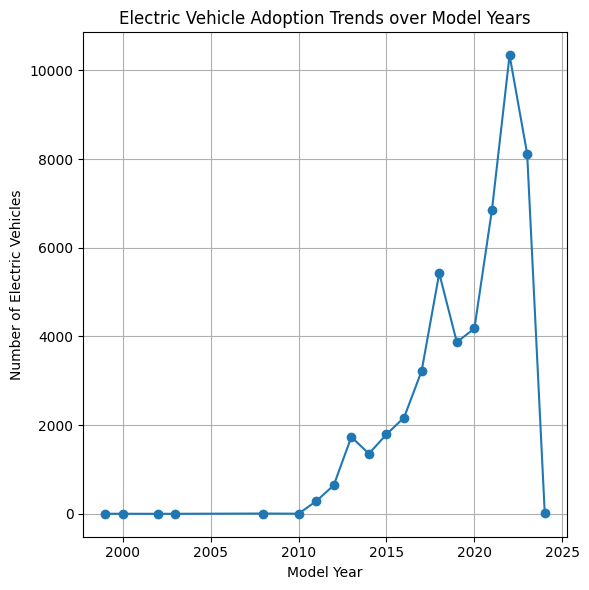

In [ ]:
#Grouping the data by model years and calculate the count of electric vehicles for each year
ev_counts_by_year = df.groupby('Model Year').size().reset_index(name='Count')

# Creating a line plot to visualize the trends in electric vehicle adoption over model years
plt.figure(figsize=(6, 6))
plt.plot(ev_counts_by_year['Model Year'], ev_counts_by_year['Count'], marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Adoption Trends over Model Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Grouping the data by model years and calculate the count of electric vehicles for each year
ev_counts_by_year = df.groupby('Model Year').size().reset_index(name='Count')

# Creating a line plot using Plotly Express to visualize the trends in electric vehicle adoption over model years
fig = px.line(ev_counts_by_year, x='Model Year', y='Count',
              title='Electric Vehicle Adoption Trends over Model Years',
              labels={'Model Year': 'Model Year', 'Count': 'Number of Electric Vehicles'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


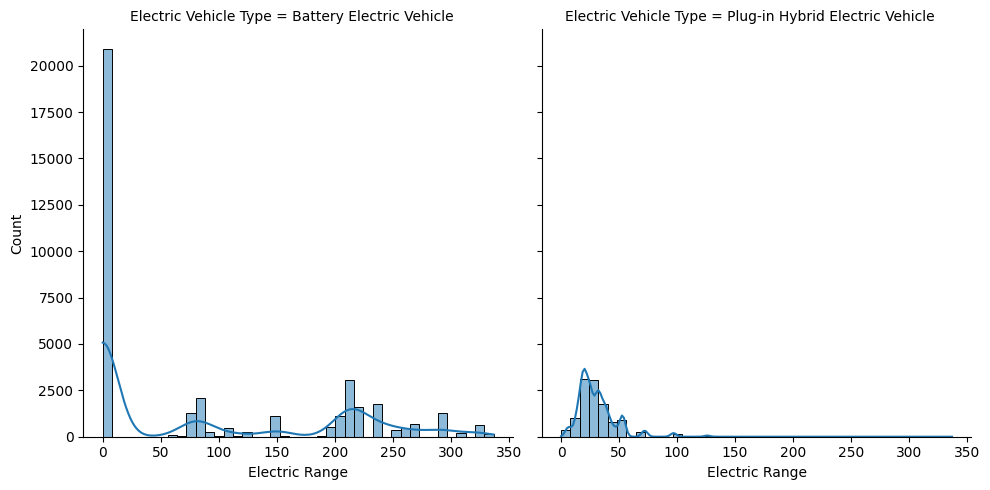

In [ ]:
sns.displot(data=df, x="Electric Range", col="Electric Vehicle Type" , kde=True)


**8.Electric Vehicle Market Analysis:**

In [ ]:
# Grouping the data by electric vehicle makes and calculate the count for each make
make_counts = df.groupby('Make').size().reset_index(name='Count')

# Calculate the total count of electric vehicles
total_count = len(df)

# Calculate the market share for each make
make_counts['Market_Share'] = (make_counts['Count'] / total_count) * 100

# Sort the data by market share in descending order
make_counts.sort_values(by='Market_Share', ascending=False, inplace=True)

# Create a bar plot using Plotly Express to visualize the market share of different electric vehicle makes
fig = px.bar(make_counts, x='Make', y='Market_Share',
             title='Market Share of Electric Vehicle Makes',
             labels={'Make': 'Electric Vehicle Make', 'Market_Share': 'Market Share (%)'},
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


In [ ]:
print(make_counts)

              Make  Count  Market_Share
30           TESLA  22817     45.609371
24          NISSAN   4969      9.932636
5        CHEVROLET   4233      8.461431
9             FORD   2545      5.087253
3              BMW   2211      4.419613
15             KIA   2084      4.165750
32          TOYOTA   1803      3.604054
33      VOLKSWAGEN   1324      2.646571
34           VOLVO   1107      2.212805
0             AUDI    978      1.954944
14            JEEP    952      1.902972
12         HYUNDAI    862      1.723070
6         CHRYSLER    804      1.607132
27          RIVIAN    721      1.441222
26         PORSCHE    358      0.715614
21   MERCEDES-BENZ    315      0.629660
7             FIAT    307      0.613669
11           HONDA    297      0.593679
22            MINI    267      0.533712
23      MITSUBISHI    261      0.521718
25        POLESTAR    230      0.459752
28           SMART    106      0.211886
29          SUBARU    100      0.199892
13          JAGUAR     95      0.189897


In [ ]:
!pip install Plotly

In [ ]:
# Create a box plot using Plotly Express with color to visualize the distribution of electric range by make
fig = px.box(df, x='Make', y='Electric Range',
             title='Electric Range by Make',
             labels={'Make': 'Make', 'Electric Range': 'Electric Range'},
             color='Make',  # Adding color to distinguish makes
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


In [ ]:
# Calculate the market share by make
make_market_share = df['Make'].value_counts(normalize=True).reset_index()
make_market_share.columns = ['Make', 'Market_Share']

# Select top N makes
top = 10
make_market_share = make_market_share.head(top)

# Create a colorful pie chart using Plotly Express to visualize the market share by make
fig = px.pie(make_market_share, values='Market_Share', names='Make',
             title='Market Share by Make',
             labels={'Market_Share': 'Market Share (%)', 'Make': 'Make'},
             color_discrete_sequence=px.colors.qualitative.Set3)  # Using a colorful color palette
fig.update_traces(textinfo='percent+label', pull=[0.1] * top)  # Pull out slices slightly

# Show the interactive plot
fig.show()


**9.Electric Vehicle Price Range:**

In [ ]:
#Feature Engineer
# Age
current_year = 2023
df['Car Age'] = current_year - df['Model Year']
df["Car Age"].head()


# Fuel Efficiency
bins = [0, 100, 200, 300, float('inf')]
labels = ['Short Range', 'Medium Range', 'Long Range', 'Very Long Range']

df['Fuel Efficiency'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=False)
df['Fuel Efficiency'].head()


# Electric Utility Feature
df['Electric Utility Feature'] = df['Electric Utility'].apply(lambda x: 'Available' if x != 'None' else "Not Available")
df['Electric Utility Feature'].head()


df[["Car Age", "Fuel Efficiency", "Electric Utility Feature"]]

Car Age  Fuel Efficiency Electric Utility Feature
0            1      Short Range                Available
1            3  Very Long Range                Available
2            4       Long Range                Available
3            1      Short Range                Available
4            2      Short Range                Available
...        ...              ...                      ...
50022        3      Short Range                Available
50023        1      Short Range                Available
50024        1      Short Range                Available
50025        0      Short Range                Available
50026        3  Very Long Range                Available

[50027 rows x 3 columns]

In [ ]:
#Extract relevant columns for the analysis
analysis = df[['Make', 'Model', 'Base MSRP', 'Electric Range', 'Electric Vehicle Type', 'Electric Utility']]

#Calculate the price range of electric vehicles
price_range = analysis['Base MSRP'].min(), analysis['Base MSRP'].max()

#Calculate summary statistics for pricing
price_statistics = analysis['Base MSRP'].describe()

#Calculate the correlation between pricing and other factors (if needed)
correlation = analysis.corr()

# Display the results
print("Price Range of Electric Vehicles:")
print(price_range)

print("\nSummary Statistics for Pricing:")
print(price_statistics)

print("\nCorrelation between Pricing and Other Factors:")
print(correlation)

Price Range of Electric Vehicles:
(0, 845000)

Summary Statistics for Pricing:
count     50027.000000
mean       1507.899334
std       10191.384929
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

Correlation between Pricing and Other Factors:
                Base MSRP  Electric Range
Base MSRP        1.000000        0.091108
Electric Range   0.091108        1.000000


**Q1. Which year has highest number makes?**

In [ ]:
# Group the data by Model Year and Make, then count the unique makes in each year
yearly_make_counts = df.groupby('Model Year')['Make'].nunique()

# Find the year with the highest number of makes
max_make_year = yearly_make_counts.idxmax()

print(f"The year with the highest number of makes is {max_make_year}")

The year with the highest number of makes is 2023


In [ ]:
# Group the data by Model Year and Make, then count the unique makes in each year
yearly_make_counts = df.groupby('Model Year')['Make'].nunique().reset_index(name='Unique Makes')

# Find the year with the highest number of makes
max_make_year = yearly_make_counts.loc[yearly_make_counts['Unique Makes'].idxmax()]['Model Year']

# Create a colorful bar plot using Plotly Express to visualize the number of unique makes per model year
fig = px.bar(yearly_make_counts, x='Model Year', y='Unique Makes',
             title='Number of Unique Makes per Model Year',
             labels={'Model Year': 'Model Year', 'Unique Makes': 'Number of Unique Makes'},
             color='Model Year',  # Adding color to distinguish model years
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Highlight the year with the highest number of makes
fig.add_vline(x=max_make_year, line_dash="dash", line_color="red", name=f'Highest ({max_make_year})')

# Show the interactive plot
fig.show()


**Q2. Which city has highest number of Electric Vehicles?**


In [ ]:
# Group the data by City and Make, then count the unique makes in each city
city_make_counts = df.groupby('City')['Make'].nunique()

# Find the city with the highest number of makes
max_make_city = city_make_counts.idxmax()

print(f"The city with the highest number of makes is {max_make_city}")

The city with the highest number of makes is Seattle


In [ ]:
# Group the data by City and sum up the counts of electric vehicles
city_ev_counts = df[df['Electric Vehicle Type'].notnull()].groupby('City')['Electric Vehicle Type'].count().reset_index()
city_ev_counts.columns = ['City', 'Number of Electric Vehicles']

# Find the top 10 cities with the most electric vehicles
top_10_cities = city_ev_counts.nlargest(10, 'Number of Electric Vehicles')

# Create the colorful bar plot using Plotly Express
fig = px.bar(top_10_cities, x='City', y='Number of Electric Vehicles',
             title='Top 10 Cities with the Most Electric Vehicles',
             labels={'City': 'City', 'Number of Electric Vehicles': 'Number of Electric Vehicles'},
             color='Number of Electric Vehicles',  # Adding color to distinguish vehicle counts
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


**Q3. The electric vehicle type which has highest Electric Range?**



In [ ]:
# Group the data by Electric Vehicle Type and find the maximum electric range in each type
max_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].max()

# Find the electric vehicle type with the highest electric range
max_range_type = max_range_by_type.idxmax()

print(f"The electric vehicle type with the highest electric range is {max_range_type}")

The electric vehicle type with the highest electric range is Battery Electric Vehicle   


In [ ]:
# Group the data by Electric Vehicle Type and find the maximum electric range in each type
max_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].max().reset_index(name='Max Electric Range')

# Create a bar plot using Plotly Express to visualize the maximum electric range for each electric vehicle type
fig = px.bar(max_range_by_type, x='Electric Vehicle Type', y='Max Electric Range',
             title='Maximum Electric Range by Electric Vehicle Type',
             labels={'Electric Vehicle Type': 'Electric Vehicle Type', 'Max Electric Range': 'Max Electric Range (Miles)'},
             width=800, height=400,
             color='Electric Vehicle Type',  # Adding color to distinguish vehicle types
             text='Max Electric Range',  # Display the numeric value on top of each bar
             )
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


**4. Which make has highest Electric Range on a particular Model Year?**

In [ ]:
# Convert 'Model Year' and 'Electric Range' columns to numeric
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range'])

# Iterate through unique Model Years
for year in df['Model Year'].unique():
    year_data = df[df['Model Year'] == year]

    # Find the row with the maximum electric range for the current year
    max_range_row = year_data.loc[year_data['Electric Range'].idxmax()]

    results = results.append({
        'Model Year': year,
        'Make': max_range_row['Make'],
        'Electric Vehicle Type': max_range_row['Electric Vehicle Type'],
        'Electric Range': max_range_row['Electric Range']
    }, ignore_index=True)

# Print the results
for idx, row in results.iterrows():
    print(f"In the year {int(row['Model Year'])}, the make with the highest electric range is {row['Make']} and the electric vehicle type is {row['Electric Vehicle Type']} with a range of {row['Electric Range']} miles.")


In the year 2022, the make with the highest electric range is TOYOTA and the electric vehicle type is Plug-in Hybrid Electric Vehicle    with a range of 42 miles.
In the year 2020, the make with the highest electric range is TESLA and the electric vehicle type is Battery Electric Vehicle    with a range of 337 miles.
In the year 2019, the make with the highest electric range is TESLA and the electric vehicle type is Battery Electric Vehicle    with a range of 289 miles.
In the year 2021, the make with the highest electric range is POLESTAR and the electric vehicle type is Battery Electric Vehicle    with a range of 233 miles.
In the year 2018, the make with the highest electric range is TESLA and the electric vehicle type is Battery Electric Vehicle    with a range of 249 miles.
In the year 2023, the make with the highest electric range is LAND ROVER and the electric vehicle type is Plug-in Hybrid Electric Vehicle    with a range of 51 miles.
In the year 2017, the make with the highest

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the features for the content-based filtering
content_features = ['Make', 'Electric Utility']

# Combine the content features into a single text-based feature
df['Content'] = df[content_features].apply(lambda x: ' '.join(map(str, x)), axis=1)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text-based content into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get indices and names of the cars
indices = pd.Series(df.index, index=df['Model']).drop_duplicates()

# Function to get recommendations
def get_recommendations(model_year, make, electric_utility, cosine_sim=cosine_sim):
    car_index = indices[model_year]
    sim_scores = list(enumerate(cosine_sim[car_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    car_indices = [i[0] for i in sim_scores]

    recommended_cars = df[['Make', 'Electric Utility', 'Model']].iloc[car_indices]
    return recommended_cars

# Get user inputs
model_year = input("Enter Model Year: ")
make = input("Enter Make: ")
electric_utility = input("Enter Electric Utility: ")

# Get recommendations based on user inputs
recommendations = get_recommendations(model_year, make, electric_utility)
print(recommendations)
